Simple notebook that shows how to create a comparer from scratch with Auxiliary date and filter

In [1]:
import modelskill as ms
import mikeio
import numpy as np

In [2]:
ds = mikeio.read('../tests/testdata/obs_two_items.dfs0')
ds

<mikeio.Dataset>
dims: (time:50328)
time: 2015-01-01 01:00:00 - 2020-09-28 00:00:00 (50328 records)
geometry: GeometryUndefined()
items:
  0:  Temperature <Temperature> (degree Celsius)
  1:  Water Level <Water Level> (meter)

First we create some random data for this example

In [3]:
df = ds.to_dataframe()
df['Temperature'] = df['Temperature'] + np.random.random(size=len(df))
df['Waves'] = df['Temperature'] + np.random.random(size=len(df))
df['Water Level'] = df['Temperature'] + np.random.random(size=len(df))
df.head()

,Temperature,Water Level,Waves
2015-01-01 01:00:00,3.397653,3.572349,4.062145
2015-01-01 02:00:00,3.984841,4.931064,4.029748
2015-01-01 03:00:00,3.160345,3.493699,3.759050
2015-01-01 04:00:00,3.463557,4.140679,4.025900
2015-01-01 05:00:00,3.484245,4.328623,3.891216


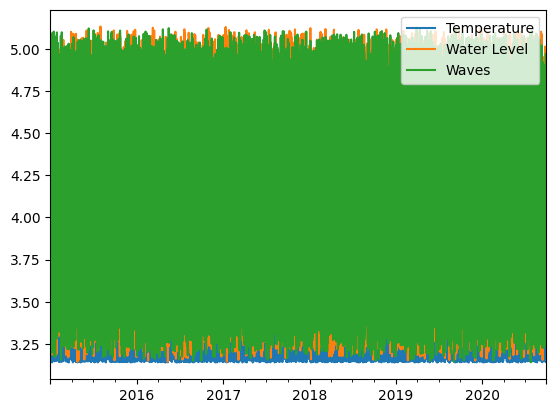

In [4]:
df.plot();

Now we make modelskill obs and mod objects

In [5]:
obs = ms.PointObservation(df, item='Temperature', aux_items='Waves', name='P1')
mod = ms.PointModelResult(df, item='Water Level', name='Mod1')

First we compare all data, and get ~50k points

In [6]:
cmp=ms.match(obs, mod)
cmp

<Comparer>
Quantity:  []
Observation: P1, n_points=50328
Model(s):
0: Mod1
 Auxiliary: Waves

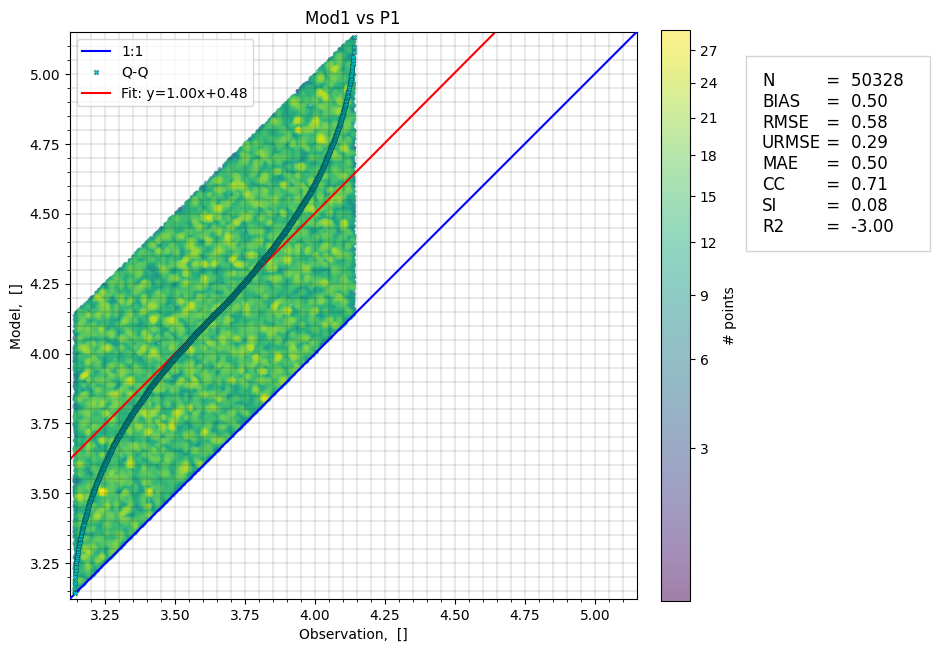

In [7]:
cmp.plot.scatter(show_points=True, skill_table=True);

Now we filter the comparer based on auxiliary data and get ~10k points

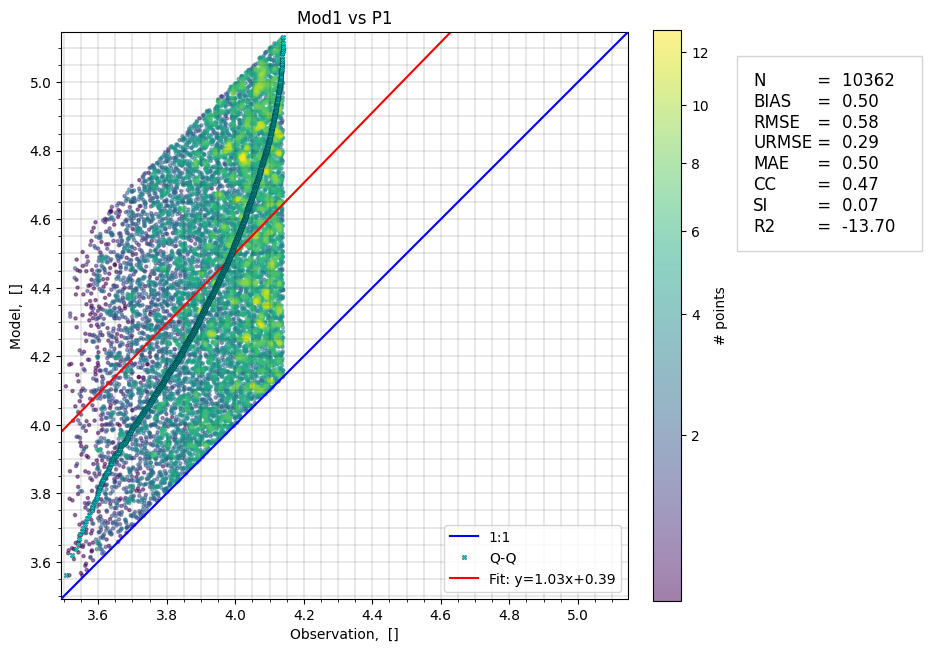

In [8]:
(cmp
 .where(cmp.data['Waves']>4.5)
 .plot.scatter(show_points=True, skill_table=True)
);